In [80]:
# chapter 2 - text prerpocessing, tokenization, embeddings

In [81]:
import urllib.request
url = ("https://raw.githubusercontent.com/rasbt/"
"LLMs-from-scratch/main/ch02/01_main-chapter-code/"
"the-verdict.txt")
file_path = "the-verdict.txt"
urllib.request.urlretrieve(url, file_path)

('the-verdict.txt', <http.client.HTTPMessage at 0x127f5aae0>)

In [82]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:raw_text = f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [83]:
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [84]:
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [85]:
result = [item for item in result if item.strip()]
result

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']

In [86]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
print(result)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'Is', ' ', 'this', '--', '', ' ', 'a', ' ', 'test', '?', '']
['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [87]:
# applying it to the dataset
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
len(preprocessed)

4690

In [88]:
preprocessed[:10]

['I',
 'HAD',
 'always',
 'thought',
 'Jack',
 'Gisburn',
 'rather',
 'a',
 'cheap',
 'genius']

In [89]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
vocab_size

1130

In [90]:
vocab = {token:integer for integer, token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [91]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    def encode(self, text):
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text) # to numerical values 
        preprocessed = [
        item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self, ids): # back to natural language
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [92]:
tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know,"
Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [93]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [94]:
text = "Hello, do you like tea?"
print(tokenizer.encode(text)) # error due to the text is not in training set. The word 'hello' not used in the short story 'The verdict'

KeyError: 'Hello'

In [95]:
# adding special context tokens :- that is we add <|unk|> to new or unknown words while <|endoftext|> for sentence completionb

In [96]:
# modifying the vocabulary 
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}
print(len(vocab.items()))

1132


In [97]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [98]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [
        item.strip() for item in preprocessed if item.strip()
        ]
        preprocessed = [item if item in self.str_to_int
        else "<|unk|>" for item in preprocessed]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [99]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [100]:
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text)) # 1131 = <|unk|> and 1130 = <|endoftext|>

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]


In [101]:
print(tokenizer.decode(tokenizer.encode(text)))

<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


In [116]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.9.0


In [117]:
tik_tokenizer = tiktoken.get_encoding('gpt2')

In [122]:
text = (
"Hello, do you like tea? <|endoftext|> In the sunlit terraces"
"of someunknownPlace."
)
integers = tik_tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [124]:
strings = tik_tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [125]:
unk = "Akwirw ier."
print(tik_tokenizer.encode(unk))

[33901, 86, 343, 86, 220, 959, 13]


In [128]:
print(tik_tokenizer.decode(tik_tokenizer.encode(unk)))

Akwirw ier.


In [129]:
# now tokenize the short story dataset using the BPE tokenizer
enc_text = tik_tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [130]:
enc_sample = enc_text[50:]
len(enc_sample)

5095

In [131]:
context_size = 4
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y: {y}")

x: [290, 4920, 2241, 287]
y: [4920, 2241, 287, 257]


In [132]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [134]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(tik_tokenizer.decode(context), "---->", tik_tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [135]:
import torch
from torch.utils.data import Dataset, DataLoader
class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []
        token_ids = tik_tokenizer.encode(txt)
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
    def __len__(self):
        return len(self.input_ids)
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [136]:
def create_dataloader_v1(txt, batch_size=4, max_length=256,
stride=128, shuffle=True, drop_last=True,
num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    dataloader = DataLoader(
                            dataset,
                            batch_size=batch_size,
                            shuffle=shuffle,
                            drop_last=drop_last,
                            num_workers=num_workers
    )
    return dataloader

In [137]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)
data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [138]:
second_batch = next(data_iter)
second_batch

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]

In [139]:
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=4, stride=4,
    shuffle=False
    )
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [140]:
# token IDs into token embedding vectors

input_ids = torch.tensor([2, 3, 5, 1])
vocab_size = 6
output_dim = 3
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [141]:
print(embedding_layer(torch.tensor([3]))) # embedding vector

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [142]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


In [143]:
# usefull embdng sizes and encode the input tokens into a
# 256-dimensional vector representation, which is smaller than what the original GPT-3
# model used (in GPT-3, the embedding size is 12,288 dimensions) but still reasonable
# for experimentation. furthermore, we assume that the token IDs were created by the
# BPE tokenizer we implemented earlier, which has a vocabulary size of 50,257:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [144]:
max_length = 4
dataloader = create_dataloader_v1(
raw_text, batch_size=8, max_length=max_length,
stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [145]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [146]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [147]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


In [148]:
# chapter 3 -  self-attention intro and MHA

In [149]:
import torch
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # your     (x^1)
 [0.55, 0.87, 0.66], # journey  (x^2)
 [0.55, 0.87, 0.66], # starts   (x^3)
 [0.22, 0.58, 0.33], # with     (x^4)
 [0.77, 0.25, 0.10], # one      (x^5)
 [0.05, 0.80, 0.55]] # step     (x^6)
)

In [150]:
inputs.shape[1]

3

In [151]:
x_2 = inputs[1] 
d_in = inputs.shape[1] # input embedding size , d = 3
d_out = 2 # output embedding size

In [152]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [153]:
W_query

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])

In [154]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


In [155]:
keys = inputs @ W_key
values = inputs @ W_value
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [156]:
keys

tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4433, 1.1419],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])

In [157]:
keys_2 = keys[1]
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22) # unnormalized attention score

tensor(1.8524)


In [158]:
attn_scores_2 = query_2 @ keys.T # computaton to all attention scores
print(attn_scores_2) # 2nd element matches we computed prev (attn_scores_22)

tensor([1.2705, 1.8524, 1.8524, 1.0795, 0.5577, 1.5440])


In [159]:
d_k = keys.shape[-1] 
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1) # qk^T / root_dk(dim of the key matrix)
print(attn_weights_2)

tensor([0.1490, 0.2249, 0.2249, 0.1302, 0.0900, 0.1808])


In [160]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3082, 0.8267])


In [161]:
# compact self-attention class

In [162]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
        
    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax( attn_scores / keys.shape[-1]**0.5, dim=-1 )
        context_vec = attn_weights @ values
        return context_vec

In [163]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs)) # inputs contains 6 embedding vectors , results in a matrix storing 6 context vectors

tensor([[0.3015, 0.8104],
        [0.3082, 0.8267],
        [0.3082, 0.8267],
        [0.2965, 0.7986],
        [0.2944, 0.7936],
        [0.3009, 0.8091]], grad_fn=<MmBackward0>)


In [164]:
# self-attention using linear layer.
# instead of manually implementing nn.Parameter(torch.rand(...)) is that nn.Linear
# has an optimized weight initialization scheme, contributing to more stable and
# effective model training.

In [165]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        
    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax( attn_scores / keys.shape[-1]**0.5, dim=-1 )
        context_vec = attn_weights @ values
        return context_vec

In [166]:
torch.manual_seed(123)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs)) # SelfAttention_v1 and SelfAttention_v2 give different outputs because
                     # they use different initial weights for the weight matrices since nn.Linear uses a more
                     # sophisticated weight initialization scheme.

tensor([[-0.5340, -0.1049],
        [-0.5326, -0.1078],
        [-0.5326, -0.1078],
        [-0.5300, -0.1074],
        [-0.5313, -0.1064],
        [-0.5302, -0.1079]], grad_fn=<MmBackward0>)


In [167]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
                                # Reuses the query and key weight matrices
                                # of the SelfAttention_v2 object from the
                                # previous section for convenience
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[0.1716, 0.1762, 0.1762, 0.1555, 0.1626, 0.1579],
        [0.1635, 0.1749, 0.1749, 0.1611, 0.1604, 0.1651],
        [0.1635, 0.1749, 0.1749, 0.1611, 0.1604, 0.1651],
        [0.1636, 0.1703, 0.1703, 0.1651, 0.1632, 0.1674],
        [0.1667, 0.1722, 0.1722, 0.1617, 0.1633, 0.1639],
        [0.1624, 0.1708, 0.1708, 0.1654, 0.1624, 0.1681]],
       grad_fn=<SoftmaxBackward0>)


In [168]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length)) #tril fn to create a mask where the values above the diagonal are zero
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [169]:
masked_simple = attn_weights * mask_simple
masked_simple

tensor([[0.1716, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1635, 0.1749, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1635, 0.1749, 0.1749, 0.0000, 0.0000, 0.0000],
        [0.1636, 0.1703, 0.1703, 0.1651, 0.0000, 0.0000],
        [0.1667, 0.1722, 0.1722, 0.1617, 0.1633, 0.0000],
        [0.1624, 0.1708, 0.1708, 0.1654, 0.1624, 0.1681]],
       grad_fn=<MulBackward0>)

In [170]:
row_sums = masked_simple.sum(dim=-1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm) # renormalize the attention weights to sum up to 1 again in each row

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4833, 0.5167, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3186, 0.3407, 0.3407, 0.0000, 0.0000, 0.0000],
        [0.2444, 0.2544, 0.2544, 0.2467, 0.0000, 0.0000],
        [0.1994, 0.2060, 0.2060, 0.1934, 0.1953, 0.0000],
        [0.1624, 0.1708, 0.1708, 0.1654, 0.1624, 0.1681]],
       grad_fn=<DivBackward0>)


In [171]:
row_sums

tensor([[0.1716],
        [0.3384],
        [0.5133],
        [0.6694],
        [0.8361],
        [1.0000]], grad_fn=<SumBackward1>)

In [172]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.3111,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.1655, 0.2602,   -inf,   -inf,   -inf,   -inf],
        [0.1655, 0.2602, 0.2602,   -inf,   -inf,   -inf],
        [0.0510, 0.1080, 0.1080, 0.0643,   -inf,   -inf],
        [0.1415, 0.1875, 0.1875, 0.0987, 0.1121,   -inf],
        [0.0476, 0.1192, 0.1192, 0.0731, 0.0477, 0.0966]],
       grad_fn=<MaskedFillBackward0>)


In [173]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4833, 0.5167, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3186, 0.3407, 0.3407, 0.0000, 0.0000, 0.0000],
        [0.2444, 0.2544, 0.2544, 0.2467, 0.0000, 0.0000],
        [0.1994, 0.2060, 0.2060, 0.1934, 0.1953, 0.0000],
        [0.1624, 0.1708, 0.1708, 0.1654, 0.1624, 0.1681]],
       grad_fn=<SoftmaxBackward0>)


In [174]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6, 6)
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [175]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6373, 0.6814, 0.6814, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5089, 0.5089, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4119, 0.0000, 0.3869, 0.0000, 0.0000],
        [0.0000, 0.3417, 0.3417, 0.3307, 0.3248, 0.0000]],
       grad_fn=<MulBackward0>)


In [176]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [177]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer( # buffers are used automatically move to the apropriate device (cpu or gpu) along with the model
        'mask',
        torch.triu(torch.ones(context_length, context_length),
        diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        attn_scores = queries @ keys.transpose(1, 2)
        attn_scores.masked_fill_(
        self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights)
        context_vec = attn_weights @ values
        return context_vec

In [178]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


In [179]:
context_vecs

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6306, -0.0630],
         [-0.5679, -0.0840],
         [-0.5529, -0.0979],
         [-0.5302, -0.1079]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6306, -0.0630],
         [-0.5679, -0.0840],
         [-0.5529, -0.0979],
         [-0.5302, -0.1079]]], grad_fn=<UnsafeViewBackward0>)

In [180]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length,
        dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(
                d_in, d_out, context_length, dropout, qkv_bias
            )
            for _ in range(num_heads)]
        )
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1) # processing sequentially not simultaneously

In [181]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2

In [182]:
mha = MultiHeadAttentionWrapper(
    d_in, d_out, context_length, 0.0, num_heads=2
)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6306, -0.0630,  0.6206,  0.3875],
         [-0.5679, -0.0840,  0.5479,  0.3597],
         [-0.5529, -0.0979,  0.5322,  0.3434],
         [-0.5302, -0.1079,  0.5077,  0.3499]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6306, -0.0630,  0.6206,  0.3875],
         [-0.5679, -0.0840,  0.5479,  0.3597],
         [-0.5529, -0.0979,  0.5322,  0.3434],
         [-0.5302, -0.1079,  0.5077,  0.3499]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


In [183]:
# tensor is two because we have 2 input texts  (the input texts are duplicated, which is why the context vectors are exactly the same for those)
# second dim refers to the 6 tokens in each input
# third dim refers to the 4 dim embedding of each token

In [184]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out,
        context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
        "d_out must be divisible by num_heads"
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # reduces the projection dim to match the desired output dim
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out) # uses a Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                diagonal=1)
        )
        
    # tensor shape: (b, num_tokens, d_out)
    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        # we implicitly split the matrix by adding a num_heads dimension.
        #then we unroll the last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim).
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(
            b, num_tokens, self.num_heads, self.head_dim
        )
        #transposes from shape (b, num_tokens, num_heads, head_dim) to (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2) 
        values = values.transpose(1, 2)
    
        attn_scores = queries @ keys.transpose(2, 3) # computes dot for each head
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens] # masks truncated to the no of tokens
    
        attn_scores.masked_fill_(mask_bool, -torch.inf) # uses mask to fill attn_scores
    
        attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
    
        context_vec = (attn_weights @ values).transpose(1, 2) # tensor shape: (b, num_tokens, n_heads, head_dim)
    
        # Combines heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(
        b, num_tokens, self.d_out
        )
        context_vec = self.out_proj(context_vec) # adds an optional linear projection
        return context_vec

In [185]:
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
[0.8993, 0.0390, 0.9268, 0.7388],
[0.7179, 0.7058, 0.9156, 0.4340]],
[[0.0772, 0.3565, 0.1479, 0.5331],
[0.4066, 0.2318, 0.4545, 0.9737],
[0.4606, 0.5159, 0.4220, 0.5786]]]])

In [186]:
print(a @ a.transpose(2, 3))

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


In [187]:
first_head = a[0, 0, :, :]
first_res = first_head @ first_head.T
print("First head:\n", first_res)
second_head = a[0, 1, :, :]
second_res = second_head @ second_head.T
print("\nSecond head:\n", second_res)

First head:
 tensor([[1.3208, 1.1631, 1.2879],
        [1.1631, 2.2150, 1.8424],
        [1.2879, 1.8424, 2.0402]])

Second head:
 tensor([[0.4391, 0.7003, 0.5903],
        [0.7003, 1.3737, 1.0620],
        [0.5903, 1.0620, 0.9912]])


In [188]:
a.shape

torch.Size([1, 2, 3, 4])

In [189]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2857, 0.3590],
         [0.2694, 0.3872],
         [0.2640, 0.3926],
         [0.2576, 0.4027]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2857, 0.3590],
         [0.2694, 0.3872],
         [0.2640, 0.3926],
         [0.2576, 0.4027]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


In [190]:
# chapter 4 - LLM architecture :-  implementing gpt-2 , transformers 124m (also diff block as exercises)

In [191]:
import torch
import torch.nn as nn

GPT_CONFIG_124M = {
"vocab_size": 50257,     # Vocabulary size
"context_length": 1024,  # Context length
"emb_dim": 768,          # Embedding dimension
"n_heads": 12,           # Number of attention heads
"n_layers": 12,          # Number of layers
"drop_rate": 0.1,        # Dropout rate
"qkv_bias": False        # Query-Key-Value bias
}

In [192]:
class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg)
            for _ in range(cfg["n_layers"])]
        )
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(
        torch.arange(seq_len, device=in_idx.device)
        )
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [193]:
class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
    def forward(self, x):
        return x
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
    def forward(self, x):
        return x

In [194]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [195]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch) # logits are unormalized model's pred before an actvn fn is applied , these values can range from -ve to +ve infinity
print("Output shape:", logits.shape) # and represent the model's confidence in assigning an input to a particular class.
logits 

Output shape: torch.Size([2, 4, 50257])


tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6754, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)

In [196]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5)
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
out

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)

In [197]:
batch_example

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]])

In [198]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [199]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[-5.9605e-08],
        [ 1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [200]:
torch.set_printoptions(sci_mode=False) 
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [201]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))
    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

In [202]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [203]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

<function matplotlib.pyplot.show(close=None, block=None)>

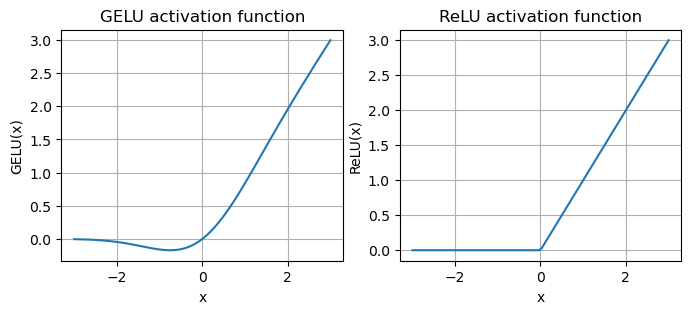

In [208]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)
plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)
# plt.tight_lay
plt.show

In [209]:
# The smoothness of GELU can lead to better optimization properties during training,
# as it allows for more nuanced adjustments to the model’s parameters. In contrast,
# ReLU has a sharp corner at zero , which can sometimes make opti-mization harder, 
# especially in networks that are very deep or have complex architectures.
# Moreover, unlike ReLU, which outputs zero for any negative input, GELU
# allows for a small, non-zero output for negative values. This characteristic means that
# during the training process, neurons that receive negative input can still contribute to
# the learning process, albeit to a lesser extent than positive inputs.

In [210]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )
    def forward(self, x):
        return self.layers(x)

In [211]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


In [212]:
# Shortcut Connections or Skip Conncetions or Residual Connections
# as the layer progress there's a high chance of problem like vanishing gradient.
# vanshing gradient :- vanishing gradient problem refers to the issue where gradients
#     (which guide weight updates during training) become progressively smaller as they
#     propagate backward through the layers, making it difficult to effectively train earlier
#     layers.
# to prevent vanishing gradiant prblem  the soln is  skip or residual conncetions :-
#         creates alternative or shotcut path for grdient flow  thruogh the network by skipping one or more layers,
#         which is achieved by adding output of one layer to the output of a later layer

In [213]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
        nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]),
        GELU()),
        nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]),
        GELU()),
        nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]),
        GELU()),
        nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]),
        GELU()),
        nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]),
        GELU())
        ])
    def forward(self, x):
        for layer in self.layers:
            layer_output = layer(x) # compute the output of the current layer
            if self.use_shortcut and x.shape == layer_output.shape: # check if shortcuts can be applied
                x = x + layer_output 
            else:
                x = layer_output
        return x

In [214]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123) # specifies random seeds for initial weights for reproducibility
model_without_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=False

)

In [215]:
def print_gradients(model, x):
    output = model(x) # fwd pass
    target = torch.tensor([[0.]])
    loss = nn.MSELoss()
    loss = loss(output, target) # calculates loss based on how close the target and output are
    loss.backward() # backward pass to calculate the gradients
    for name, param in model.named_parameters():
        if 'weight' in name:
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [216]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173587836325169
layers.1.0.weight has gradient mean of 0.0001201116101583466
layers.2.0.weight has gradient mean of 0.0007152041071094573
layers.3.0.weight has gradient mean of 0.0013988735154271126
layers.4.0.weight has gradient mean of 0.005049645435065031


In [217]:
# the gradient becomes smaller when we progress from the last layer (vanishing gradient)

In [218]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut=True # applying skip connections
)
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169791162014008
layers.1.0.weight has gradient mean of 0.20694106817245483
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732204914093
layers.4.0.weight has gradient mean of 1.3258540630340576


In [219]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        
        shortcut = x # shortcut conn for attention block
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_shortcut(x)
        x = x + shortcut # add the orginal input back

        shortcut = x # shortcut conn for ff block
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut # adds the orginal back
        return x
                

In [220]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768) # smaple i/p shape [batch_size, num_tokens, num_emb]
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


In [221]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb( 
        torch.arange(seq_len, device=in_idx.device) # device setting will allow us to train the model on a CPU or GPU, depending on which device the input data sits on.
        )
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [222]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.3613,  0.4223, -0.0711,  ...,  0.3483,  0.4661, -0.2838],
         [-0.1792, -0.5660, -0.9485,  ...,  0.0477,  0.5181, -0.3168],
         [ 0.7120,  0.0332,  0.1085,  ...,  0.1018, -0.4327, -0.2553],
         [-1.0076,  0.3418, -0.1190,  ...,  0.7195,  0.4023,  0.0532]],

        [[-0.2564,  0.0900,  0.0335,  ...,  0.2659,  0.4454, -0.6806],
         [ 0.1230,  0.3653, -0.2074,  ...,  0.7705,  0.2710,  0.2246],
         [ 1.0558,  1.0318, -0.2800,  ...,  0.6936,  0.3205, -0.3178],
         [-0.1565,  0.3926,  0.3288,  ...,  1.2630, -0.1858,  0.0388]]],
       grad_fn=<UnsafeViewBackward0>)


In [223]:
total_params = sum(p.numel() for p in model.parameters()) # analyzing size using numel() - number of elements, we can collect
print(f"Total number of parameters: {total_params:,}") # total number of parameters in the model's parameter tensors.

Total number of parameters: 163,009,536


In [224]:
# why 163m instead of 124m ? - reason is a concept called "weight tying" which was used in the original GPT-2 architecture.
# It means that the original GPT-2 architecture reuses the weights from the tokn embdng layer in its output layer.
# To understand better, let’s take a look at the shapes of the token emdng layer and linear ouput layer that we initialzed
# on the model via the GPTModel earlier:

In [225]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


In [226]:
# token embedding and output layers are very large due to the number of rows for
# the 50,257 in the tokenizer’s vocabulary. Let’s remove the output layer parameter
# count from the total GPT-2 model count according to the weight tying:

In [227]:
total_params_gpt2 = (
total_params - sum(p.numel()
for p in model.out_head.parameters())
)
print(f"Number of trainable parameters "
f"considering weight tying: {total_params_gpt2:,}"
)

Number of trainable parameters considering weight tying: 124,412,160


In [228]:
# number of parameters in feed forward and attention modules:

In [229]:
ffn_param = sum(p.numel() for p in ffn.parameters())
print(f"feed fwd parameteres: {ffn_param:,}")
ffn

feed fwd parameteres: 4,722,432


FeedForward(
  (layers): Sequential(
    (0): Linear(in_features=768, out_features=3072, bias=True)
    (1): GELU()
    (2): Linear(in_features=3072, out_features=768, bias=True)
  )
)

In [230]:
mha_param = sum(p.numel() for p in mha.parameters())
print(f"MultiHeadAttn parameters: {mha_param:,}")
mha

MultiHeadAttn parameters: 24


MultiHeadAttention(
  (W_query): Linear(in_features=3, out_features=2, bias=False)
  (W_key): Linear(in_features=3, out_features=2, bias=False)
  (W_value): Linear(in_features=3, out_features=2, bias=False)
  (out_proj): Linear(in_features=2, out_features=2, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)

In [231]:
(768 * 3072) * 2 # ffnn

4718592

In [232]:
((3 * 768) * 3) + (768 * 768) # mha

596736

In [233]:
# lastly compute the memory req for 163m
total_size_bytes = total_params * 4
total_size_mb = total_size_bytes / (1024 * 1024)
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


In [234]:
# initializing larger gpt models, first gpt_medium with 24 tfr blocks

In [235]:
GPT_CONFIG_MEDIUM = {
"vocab_size": 50257,     # Vocabulary size
"context_length": 1024,  # Context length
"emb_dim": 1024,          # Embedding dimension
"n_heads": 16,           # Number of attention heads
"n_layers": 24,          # Number of layers
"drop_rate": 0.1,        # Dropout rate
"qkv_bias": False        # Query-Key-Value bias
}

In [236]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb( 
        torch.arange(seq_len, device=in_idx.device) # device setting will allow us to train the model on a CPU or GPU, depending on which device the input data sits on.
        )
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [237]:
torch.manual_seed(123)
gpt_medium = GPTModel(GPT_CONFIG_MEDIUM)
medium_out = gpt_medium(batch)
print(medium_out.shape)
medium_out

torch.Size([2, 4, 50257])


tensor([[[ 0.5553,  0.4949,  0.3092,  ..., -0.2539, -0.3032,  0.2971],
         [ 0.3024, -0.0328, -0.5984,  ..., -0.6252, -0.5445, -0.9409],
         [ 0.4388,  0.3456, -0.2936,  ...,  0.5144,  0.0907,  0.0242],
         [ 0.1325,  0.6145, -0.8940,  ...,  0.3889,  0.0279, -0.5072]],

        [[ 1.0220,  0.3779,  0.8361,  ...,  0.1372, -0.2403,  0.8152],
         [ 0.0192,  0.3544, -0.5428,  ..., -0.0214,  0.0261, -0.4027],
         [ 0.2641,  0.1448, -0.3102,  ..., -0.0764, -0.4402,  0.2604],
         [ 0.6284,  1.2054, -0.6994,  ...,  0.0841, -0.3732, -0.1643]]],
       grad_fn=<UnsafeViewBackward0>)

In [238]:
ttl_gpt_medium_params = sum(p.numel() for p in gpt_medium.parameters()) # small model has 163,009,536 , 24 block has 406m
print(f"{ttl_gpt_medium_params:,}")

406,212,608


In [239]:
ttl_gpt_medium_params = (
total_params - sum(p.numel()
for p in gpt_medium.out_head.parameters())
)
print(f"Number of trainable parameters "
f"considering weight tying: {ttl_gpt_medium_params:,}"
)

Number of trainable parameters considering weight tying: 111,546,368


In [240]:
# gpt_large  with 36 tfr blocks

In [241]:
GPT_CONFIG_LARGE = {
"vocab_size": 50257,     # Vocabulary size
"context_length": 1024,  # Context length
"emb_dim": 1280,          # Embedding dimension
"n_heads": 20,           # Number of attention heads
"n_layers": 36,          # Number of layers
"drop_rate": 0.1,        # Dropout rate
"qkv_bias": False        # Query-Key-Value bias
}

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb( 
        torch.arange(seq_len, device=in_idx.device) # device setting will allow us to train the model on a CPU or GPU, depending on which device the input data sits on.
        )
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [242]:
torch.manual_seed(123)
gpt_large = GPTModel(GPT_CONFIG_LARGE)
large_out = gpt_large(batch)
print(large_out.shape)
large_out

torch.Size([2, 4, 50257])


tensor([[[    -0.1292,     -0.3847,      0.2248,  ...,      0.5369,
               0.3691,     -0.7619],
         [     0.4239,      0.2338,     -1.0530,  ...,     -0.0855,
              -0.6005,     -0.4725],
         [     0.2074,     -0.6801,     -0.0454,  ...,     -1.2456,
              -0.8294,     -0.0187],
         [     0.4618,     -0.2833,     -0.4043,  ...,      0.0392,
              -0.5204,     -0.2321]],

        [[    -0.6438,      0.1008,      0.2805,  ...,      0.5632,
               0.7455,     -0.3469],
         [     0.5257,     -0.0004,     -0.1389,  ...,     -0.3714,
               0.3727,      0.1004],
         [     0.3873,     -0.7259,     -0.1061,  ...,     -1.1120,
              -0.4745,      0.2956],
         [     0.2372,     -0.0430,      0.1782,  ...,     -0.4974,
              -0.2305,      0.2401]]], grad_fn=<UnsafeViewBackward0>)

In [243]:
ttl_gpt_large_params = sum(p.numel() for p in gpt_large.parameters()) 
print(f"{ttl_gpt_large_params:,}")

838,220,800


In [244]:
ttl_gpt_large_params = (
total_params - sum(p.numel()
for p in gpt_large.out_head.parameters())
)
print(f"Number of trainable parameters "
f"considering weight tying: {ttl_gpt_large_params:,}"
)

Number of trainable parameters considering weight tying: 98,680,576


In [245]:
# gpt xl with tfr blocks 32

In [246]:
GPT_CONFIG_XL = {
"vocab_size": 50257,     # Vocabulary size
"context_length": 1024,  # Context length
"emb_dim": 1600,          # Embedding dimension
"n_heads": 25,           # Number of attention heads
"n_layers": 48,          # Number of layers
"drop_rate": 0.1,        # Dropout rate
"qkv_bias": False        # Query-Key-Value bias
}

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb( 
        torch.arange(seq_len, device=in_idx.device) # device setting will allow us to train the model on a CPU or GPU, depending on which device the input data sits on.
        )
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [247]:
torch.manual_seed(123)
gpt_xl = GPTModel(GPT_CONFIG_XL)
xl_out = gpt_xl(batch)
print(xl_out.shape)
xl_out

torch.Size([2, 4, 50257])


tensor([[[-0.1291,  0.3885,  0.1057,  ...,  0.0180,  0.2309, -0.3901],
         [-0.2870, -0.0277, -0.3349,  ..., -0.0724,  0.1030, -0.3322],
         [-0.6001, -0.2720,  0.3672,  ...,  0.0804,  0.6928,  0.0880],
         [-1.3517, -0.3163,  0.2312,  ...,  0.3396, -0.0351,  0.3853]],

        [[-0.1893,  0.3246, -0.1917,  ..., -0.2170,  0.2229, -0.6889],
         [ 0.0024, -0.1743, -0.2006,  ...,  0.0684, -0.9490, -0.8778],
         [-0.0397,  0.0353,  0.2041,  ..., -0.3985,  0.1638, -0.2869],
         [-0.7979,  0.2167, -0.0873,  ...,  0.9055, -0.4025, -0.0753]]],
       grad_fn=<UnsafeViewBackward0>)

In [248]:
ttl_gpt_large_params = sum(p.numel() for p in gpt_xl.parameters()) 
print(f"{ttl_gpt_large_params:,}") 

1,637,792,000


In [249]:
ttl_gpt_xl_params = (
total_params - sum(p.numel()
for p in gpt_xl.out_head.parameters())
)
print(f"Number of trainable parameters "
f"considering weight tying: {ttl_gpt_xl_params:,}"
)

Number of trainable parameters considering weight tying: 82,598,336


In [250]:
def generate_text_simple(model, idx, # dx is a (batch, n_tokens) array of indices in the current context.
    max_new_tokens, context_size):
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:] # crops current context if exceeds the supported context size, if llm supports only 5 tokens, and the context is 10, then only the last 5 tokens are used as context
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :] # Focuses only on the last time step, so that (batch, n_token, vocab_size) becomes (batch, vocab_size)
        probas = torch.softmax(logits, dim=-1) # prob has shape (batch, vocab_size).
        idx_next = torch.argmax(probas, dim=-1, keepdim=True) # idx next has shape(batch, 1)
        idx = torch.cat((idx, idx_next), dim=1) # appends sampled text to the running sequence, where idx has shape(batch, n_tokens+1)
    return idx

In [251]:
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0) # adds batch dim
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


In [252]:
model.eval() # Disables dropout since we are not training the model
out = generate_text_simple(
model=model,
idx=encoded_tensor,
max_new_tokens=6,
context_size=GPT_CONFIG_124M["context_length"]
)
print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]])
Output length: 10


In [253]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am Featureiman Byeswickattribute argue


In [254]:
# chapter 5 - pretraining , model evaluation, taking pretrained weights

In [256]:
import torch
# from chapter04 import GPTModel
GPT_CONFIG_124M = {
"vocab_size": 50257,
"context_length": 256, # 1024 to 256
"emb_dim": 768,
"n_heads": 12,
"n_layers": 12,
"drop_rate": 0.1, # It’s possible and common to set dropout to 0.
"qkv_bias": False
}
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [259]:
import tiktoken
# from chapter04 import generate_text_simple

def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # .unsqueeze(0) adds the batch dimension
    return encoded_tensor
    
def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # removes batch dimension
    return tokenizer.decode(flat.tolist())
start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")
token_ids = generate_text_simple(
model=model,
idx=text_to_token_ids(start_context, tokenizer),
max_new_tokens=10,
context_size=GPT_CONFIG_124M["context_length"]
)
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))


Output text:
 Every effort moves you rentingetic wasnم refres RexMeCHicular stren


In [260]:
inputs = torch.tensor([[16833, 3626, 6100], # ["every effort moves",
[40, 1107, 588]]) # "I really like"

In [261]:
targets = torch.tensor([[3626, 6100, 345 ], # [" effort moves you",
[1107, 588, 11311]]) # " really like chocolate"]

In [262]:
with torch.no_grad(): # not training so dsable gradient tracking
    logits = model(inputs)
probas = torch.softmax(logits, dim=-1) # prob of each token in vocabulary
print(probas.shape)

torch.Size([2, 3, 50257])


In [263]:
token_ids = torch.argmax(probas, dim=-1, keepdim=True)
print("Token IDs:\n", token_ids)

Token IDs:
 tensor([[[16657],
         [  339],
         [42826]],

        [[49906],
         [29669],
         [41751]]])


In [265]:
print(f"Targets batch 1: {token_ids_to_text(targets[0], tokenizer)}")
print(f"Outputs batch 1: "f" {token_ids_to_text(token_ids[0].flatten(), tokenizer)}")

Targets batch 1:  effort moves you
Outputs batch 1:   Armed heNetflix


In [266]:
text_idx = 0
target_probas_1 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 1:", target_probas_1)
text_idx = 1
target_probas_2 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 2:", target_probas_2)

Text 1: tensor([    0.0001,     0.0000,     0.0000])
Text 2: tensor([    0.0000,     0.0001,     0.0000])


In [267]:
log_probas = torch.log(torch.cat((target_probas_1, target_probas_2)))
print(log_probas)

tensor([ -9.5042, -10.3796, -11.3677, -11.4798,  -9.7764, -12.2561])


In [268]:
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)

tensor(-10.7940)


In [269]:
neg_avg_log_probas = avg_log_probas * -1
print(neg_avg_log_probas)

tensor(10.7940)


In [270]:
print("Logits shape:", logits.shape)
print("Targets shape:", targets.shape)

Logits shape: torch.Size([2, 3, 50257])
Targets shape: torch.Size([2, 3])


In [271]:
logits_flat = logits.flatten(0, 1)
targets_flat = targets.flatten()
print("Flattened logits:", logits_flat.shape)
print("Flattened targets:", targets_flat.shape)

Flattened logits: torch.Size([6, 50257])
Flattened targets: torch.Size([6])


In [272]:
loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
print(loss)

tensor(10.7940)


In [274]:
file_path = "the-verdict.txt"
with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.read()

In [275]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))
print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 20479
Tokens: 5145


In [276]:
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

In [277]:
# from chapter02 import create_dataloader_v1
torch.manual_seed(123)
train_loader = create_dataloader_v1(
train_data,
batch_size=2,
max_length=GPT_CONFIG_124M["context_length"],
stride=GPT_CONFIG_124M["context_length"],
drop_last=True,
shuffle=True,
num_workers=0
)
val_loader = create_dataloader_v1(
val_data,
batch_size=2,
max_length=GPT_CONFIG_124M["context_length"],
stride=GPT_CONFIG_124M["context_length"],
drop_last=False,
shuffle=False,
num_workers=0
)

In [281]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)
print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])


In [283]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch = input_batch.to(device) # the transfer to a given device allows us to transfer the data to a GPU.
    target_batch = target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(
    logits.flatten(0, 1), target_batch.flatten()
    )
    return loss

In [287]:
def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader) # iteratives over all batches if no fixed num_batches is specified
    else:
        num_batches = min(num_batches, len(data_loader)) # reduces the number of batches to match the total number of batches in the data loader if num_batches exceeds the number of batches in the data loader
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(
            input_batch, target_batch, model, device
            )
            total_loss += loss.item() # sum loss for each batch
        else:
            break
    return total_loss / num_batches # avg loss over all batches

In [288]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
with torch.no_grad(): # disables gradient tracking for efficiency because we are not training yet
    train_loss = calc_loss_loader(train_loader, model, device) # sure the data is loaded onto the same device as the LLM model.
    val_loss = calc_loss_loader(val_loader, model, device)
print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.987583690219456
Validation loss: 10.98110580444336


In [290]:
def train_model_simple(model, train_loader, val_loader,
    optimizer, device, num_epochs,
    eval_freq, eval_iter, start_context, tokenizer):
    train_losses, val_losses, track_tokens_seen = [], [], [] # initialized list to track losses and tokens each
    tokens_seen, global_step = 0, -1
    
    for epoch in range(num_epochs): # starts the training loop 
        model.train() # Starts the main training loop
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # resets loss gradients from prev batch iteration
            loss = calc_loss_batch(
                input_batch, target_batch, model, device
            )
            loss.backward() # calc loss gradients
            optimizer.step() # updates model weights using loss gradients
            tokens_seen += input_batch.numel()
            global_step += 1
            
            if global_step % eval_freq == 0: # optional evaluation step
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                    f"Train loss {train_loss:.3f}, "
                    f"Val loss {val_loss:.3f}"
                )
                generate_and_print_sample( # prints a sample text after each epoch
                    model, tokenizer, device, start_context
                )
    return train_losses, val_losses, track_tokens_seen

In [291]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval() # dropout disabled during eval for stable, reproducible results
    with torch.no_grad(): # disabled which is not required during evaluation, to reduce the computational overhead
        train_loss = calc_loss_loader(
        train_loader, model, device, num_batches=eval_iter
        )
        val_loss = calc_loss_loader(
        val_loader, model, device, num_batches=eval_iter
        )
    model.train()
    return train_loss, val_loss

In [292]:
def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model, idx=encoded,
            max_new_tokens=50, context_size=context_size
        )
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))
    model.train()

In [293]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(
model.parameters(), # method returns all trainable weight params of the model
    lr=0.0004, weight_decay=0.1
)
num_epochs = 10
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="Every effort moves you", tokenizer=tokenizer
)

Ep 1 (Step 000000): Train loss 9.781, Val loss 9.933
Every effort moves you,,,,,,,,,,,,,,,,,,,,,,,,,,,,, the the,,,,,,,,,,,,,,,,,,,
Ep 1 (Step 000005): Train loss 8.111, Val loss 8.339
Every effort moves you, the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the
Ep 2 (Step 000010): Train loss 6.661, Val loss 7.048
Every effort moves you,,,,,,,,,,,,,,,,,,,,,,,,,,,,, the,,,,,,,,,,,,,,,,,,,,
Ep 2 (Step 000015): Train loss 5.961, Val loss 6.616
Every effort moves you, and, and,, and, and,,, and, and, and,, and,,,, and, and,, and,,,, and,, and,,, and, and,,, and, and
Ep 3 (Step 000020): Train loss 5.726, Val loss 6.600
Every effort moves you, and I had"                                             
Ep 3 (Step 000025): Train loss 5.201, Val loss 6.348
Every effort moves you his! Gisburn. Gisburn to the picture.   "I        "I. "I the of the--and it.  "I

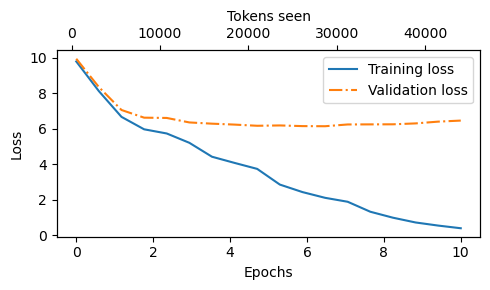

In [296]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(
    epochs_seen, val_losses, linestyle="-.", label="Validation loss"
    )
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2 = ax1.twiny()
    ax2.plot(tokens_seen, train_losses, alpha=0)
    ax2.set_xlabel("Tokens seen")
    fig.tight_layout()
    plt.show()
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

In [297]:
model.to("cpu")
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [298]:
tokenizer = tiktoken.get_encoding("gpt2")
token_ids = generate_text_simple(
model=model,
idx=text_to_token_ids("Every effort moves you", tokenizer),
max_new_tokens=25,
context_size=GPT_CONFIG_124M["context_length"]
)
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you know," was one of the axioms he laid down across the Sevres and silver of an exquisitely appointed lun


In [299]:
vocab = {
"closer": 0,
"every": 1,
"effort": 2,
"forward": 3,
"inches": 4,
"moves": 5,
"pizza": 6,
"toward": 7,
"you": 8,
}
inverse_vocab = {v: k for k, v in vocab.items()}

In [336]:
next_token_logits = torch.tensor(
[4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

In [337]:
probas = torch.softmax(next_token_logits, dim=0)
next_token_id = torch.argmax(probas).item()
print(inverse_vocab[next_token_id])
probas

forward


tensor([    0.0609,     0.0016,     0.0001,     0.5721,     0.0034,     0.0001,
            0.0001,     0.3576,     0.0040])

In [338]:
torch.manual_seed(123)
next_token_id = torch.multinomial(probas, num_samples=1).item()
print(inverse_vocab[next_token_id])

forward


In [339]:
def print_sampled_tokens(probas):
    torch.manual_seed(123)
    sample = [torch.multinomial(probas, num_samples=1).item()
                for i in range(1_000)]
    sampled_ids = torch.bincount(torch.tensor(sample))
    for i, freq in enumerate(sampled_ids):
        print(f"{freq} x {inverse_vocab[i]}")
print_sampled_tokens(probas)

73 x closer
0 x every
0 x effort
582 x forward
2 x inches
0 x moves
0 x pizza
343 x toward


In [340]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

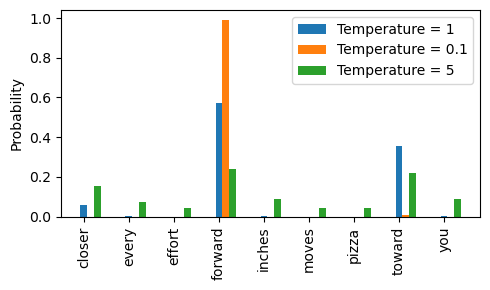

In [341]:
temperatures = [1, 0.1, 5] # orginal, lower and higher confidence
scaled_probas = [softmax_with_temperature(next_token_logits, T)
                for T in temperatures]
x = torch.arange(len(vocab))
bar_width = 0.15
fig, ax = plt.subplots(figsize=(5, 3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i],
                bar_width, label=f'Temperature = {T}')
ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

In [346]:
# why top-k? using top-k , telling the model to select only from the top-k samples(highest probability).
# rather than looking for the entire logits, to do this- select highest probabilities samples from the logits
# and the rest will be masked (just like chapter-3 causal attention) 
# replaces with -inf before softmax after the rest of the logits would be assingned 0.00 nd the remaining probabilities sum up to 1

In [347]:
top_k = 3
top_logits, top_pos = torch.topk(next_token_logits, top_k)
print("Top logits:", top_logits)
print("Top positions:", top_pos)

Top logits: tensor([6.7500, 6.2800, 4.5100])
Top positions: tensor([3, 7, 0])


In [349]:
new_logits = torch.where(
    condition=next_token_logits < top_logits[-1], # identifies logits less than the min in the top 3
    input=torch.tensor(float('-inf')), # assigns -inf to lower logits
    other=next_token_logits # retains the orginal logits for all othre tokens
)
print(new_logits)

tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])


In [350]:
topk_probas = torch.softmax(new_logits, dim=0)
print(topk_probas)

tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])


In [353]:
def generate(model, idx, max_new_tokens, context_size,
                temperature=0.0, top_k=None, eos_id=None):
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
                logits = model(idx_cond)
        logits = logits[:, -1, :]
            
        if top_k is not None: # filters logits with top-k sampling 
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(
                logits < min_val,
                torch.tensor(float('-inf')).to(logits.device),
                logits
            )
        if temperature > 0.0: # applies temperature scaling
            logits = logits / temperature
            probs = torch.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
        else:     # Carries out greedy next-token selection as before when temperature scaling is disabled
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)
        if idx_next == eos_id: # stops generating early if end-of-seq token is encountered
            break
        idx = torch.cat((idx, idx_next), dim=1)
    return idx

In [354]:
torch.manual_seed(123)
token_ids = generate(
model=model,
idx=text_to_token_ids("Every effort moves you", tokenizer),
max_new_tokens=15,
context_size=GPT_CONFIG_124M["context_length"],
top_k=25,
temperature=1.4
)
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you stand to work on surprise, a one of us had gone with random-


In [355]:
torch.save(model.state_dict(), "model.pth")

In [356]:
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(torch.load("model.pth", map_location=device))
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [357]:
torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    },
    "model_and_optimizer.pth"
)

In [358]:
checkpoint = torch.load("model_and_optimizer.pth", map_location=device)
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(checkpoint["model_state_dict"])
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
model.train();